DAY 7 CHALLENGE - Decrease in drug use and free text analysis
For today's challenge, you will use all of the concepts that you learned in this session and apply them to a new dataset. The dataset provides information about why different drug users decided to decrease their use of drugs during the pandemic. This information is available in the format of free text answers. The aim of this challenge is to find out what are the most common reasons behind the decrease in drug use, and to identify what is the most dominant one. Concretely, you are expected to do the following:

Clean the free text data by completing all the following steps: a) turning all letters to lower case, b) removal of punctuation, special characters and digits, c) tokenization, d) stop words removal, e) lemmatization and f) removal of empty answers
Identify the optimal number of topics using the coherence score, together with some qualitative analysis.
Run LDA analysis to identify the most common topics, and interpret the meaning of each topic. Idenitify the dominant topics across all participants' answers.
BONUS (You get extra points if you do it, but you won't lose points if you don't do it): try to use different visualization techniques to better represent your topics and their distributions across the answers of the participants.
The data are available in the csv file called Day7_challenge.csv

In [1]:
pip install gensim nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import warnings 
import gensim
import nltk
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)

sb.set_theme("talk")
sb.set_style("whitegrid")

In [4]:
df=pd.read_csv('Day7_challenge.csv')

In [5]:
df

,user_id,How has your drug use changed due to the pandemic?,Why has your drug use changed during the pandemic?
0,0b4d4414-529a-4c54-bed8-e0936cb09576,I am using less,Less bothered too lazy even for drugs
1,0e6e9a41-671d-44b5-9825-483dc1066606,I am using less,Stopped.
2,0faf0029-b51c-40dd-9738-8e1467b1079c,I am using less,I’ve been away from uni and with my family instead so less peer pressure and access to drugs. Also haven’t been able to go out to clubs where most of my drug use occurs.
3,11ddca95-7fbf-4d83-b3a9-5a68d75bb210,I am using less,No social interaction
4,1d9d9d93-4933-485e-97c1-025038933c0d,I am using less,Online order easier or mushrooms
...,...,...,...
1008,592c5202b1464250846083ac00c87735,I am using less,holidays
1009,03911155-109d-4075-bd4e-8b564bbf69ed,I am using less,Decrease in social events where said drug use would be appropriate.
1010,65d63ec9-590d-4a5d-81d5-db1990b98492,I am using less,"Not in a social setting, or in a relationship"
1011,23aabe8b-302c-4370-b6fd-ae99ae2d5ede,I am using less,Don’t use recreational drugs


In [6]:
df.rename(columns={'How has your drug use changed due to the pandemic?':'How','Why has your drug use changed during the pandemic?':'Why'},inplace=True)

In [8]:
df.set_index('user_id')

,How,Why
user_id,,
0b4d4414-529a-4c54-bed8-e0936cb09576,I am using less,Less bothered too lazy even for drugs
0e6e9a41-671d-44b5-9825-483dc1066606,I am using less,Stopped.
0faf0029-b51c-40dd-9738-8e1467b1079c,I am using less,I’ve been away from uni and with my family instead so less peer pressure and access to drugs. Also haven’t been able to go out to clubs where most of my drug use occurs.
11ddca95-7fbf-4d83-b3a9-5a68d75bb210,I am using less,No social interaction
1d9d9d93-4933-485e-97c1-025038933c0d,I am using less,Online order easier or mushrooms
...,...,...
592c5202b1464250846083ac00c87735,I am using less,holidays
03911155-109d-4075-bd4e-8b564bbf69ed,I am using less,Decrease in social events where said drug use would be appropriate.
65d63ec9-590d-4a5d-81d5-db1990b98492,I am using less,"Not in a social setting, or in a relationship"


In [11]:
df.How.value_counts()

I am using less    1013
Name: How, dtype: int64

In [12]:
df.isna().sum()

user_id    0
How        0
Why        0
dtype: int64

In [13]:
df['Why'].to_list()

['Less bothered too lazy even for drugs',
 'Stopped.',
 'I’ve been away from uni and with my family instead so less peer pressure and access to drugs. Also haven’t been able to go out to clubs where most of my drug use occurs.',
 'No social interaction ',
 'Online order easier or mushrooms ',
 'Not living with friends',
 'More time to reflect',
 "I'm pregnant",
 'Less opportunity and no social events where they may be available. ',
 'I have tried drugs in the past, mainly cannabis, but I stopped 4 years ago and have not taken anything since.  Unfortunately, since this scenario is never envisaged, the test seems to assume that if you tried drugs once (as asked) you will never stop. ',
 'Unable to meet with friends',
 'not going to parties or raves',
 'Social',
 'No access',
 'No access',
 'Less nights out ',
 'Had no desire ',
 'Social aspect is gone.',
 'Financial and decided to quit for better health',
 'Lost interest ',
 'Unable to socialise with friends go to the pub nightclubs even

In [14]:
#removal of upper case letters
df['Why'] = df['Why'].str.lower() 

In [15]:
#Removal of punctuation and characters
df['Why'] = df['Why'].str.replace('[,\.!?/&]', '')
df['Why'] = df['Why'].str.replace('\d+', '')

In [24]:
data = df['Why'].to_list()
data

['less bothered too lazy even for drugs',
 'stopped',
 'i’ve been away from uni and with my family instead so less peer pressure and access to drugs also haven’t been able to go out to clubs where most of my drug use occurs',
 'no social interaction ',
 'online order easier or mushrooms ',
 'not living with friends',
 'more time to reflect',
 "i'm pregnant",
 'less opportunity and no social events where they may be available ',
 'i have tried drugs in the past mainly cannabis but i stopped  years ago and have not taken anything since  unfortunately since this scenario is never envisaged the test seems to assume that if you tried drugs once (as asked) you will never stop ',
 'unable to meet with friends',
 'not going to parties or raves',
 'social',
 'no access',
 'no access',
 'less nights out ',
 'had no desire ',
 'social aspect is gone',
 'financial and decided to quit for better health',
 'lost interest ',
 'unable to socialise with friends go to the pub nightclubs events ect',
 'a

In [26]:
#Tokenisation of the data
data_words = []
for sentence in data:
    listwords = gensim.utils.simple_preprocess(str(sentence), deacc=True, min_len=2, max_len=20)
    data_words.append(listwords)
    
data_words[8]

['less',
 'opportunity',
 'and',
 'no',
 'social',
 'events',
 'where',
 'they',
 'may',
 'be',
 'available']

In [27]:
#Removing stopwords
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english') 
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/louiserigny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
custom_stop = ['goes','with', 'to','about','etc','either', 'le','going','anymore','like','ago','much'] 
finalstop = stop + custom_stop
print(finalstop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [50]:
data_words_final = []

for answer in data_words:
    data_words_cleaned = []
    for word in answer:
        if word not in finalstop:
            data_words_cleaned.append(word)
    data_words_final.append(data_words_cleaned)

print("Before:" , data_words[10]  ) 
print("After:" , data_words_final[10]  ) 

Before: ['unable', 'to', 'meet', 'with', 'friends']
After: ['unable', 'meet', 'friends']


In [51]:
#lemmatisation of the data, meaning, grouping together different inflected forms of the same word 
nltk.download('wordnet')
nltk.download('omw-1.4')
lemma = nltk.stem.wordnet.WordNetLemmatizer()

data_words_lemmatized = []
for answer in data_words_final:
    data_words_cleaned = []
    for word in answer:
        lematized = lemma.lemmatize(word)
        data_words_cleaned.append(lematized)
    data_words_lemmatized.append(data_words_cleaned)

print("Before:" , data_words_final[10]  ) 
print("After:" , data_words_lemmatized[10]  ) 

Before: ['unable', 'meet', 'friends']
After: ['unable', 'meet', 'friend']


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/louiserigny/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/louiserigny/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [52]:
len(data_words_lemmatized)

1013

In [53]:
#removing answers where participants didn't respond properly
data_words_lemmatized_cleaned = []
dropped_ids = []
for i, answer in enumerate(data_words_lemmatized):
    if answer:
        data_words_lemmatized_cleaned.append(answer)
    else:
        dropped_ids.append(i)
        
    
len(data_words_lemmatized_cleaned)

957

In [55]:
df_cleaned=data_words_lemmatized_cleaned

In [37]:
#The data has been cleaned. Now onto topic modelling

In [56]:
#as one of the arguments of the LDA is a dictionary, we convert the words in the text to correspond to an ID. Calling the key (index) in this dictionary will output the value (word)
id2word = gensim.corpora.Dictionary(df_cleaned)
print(id2word[1])
print(id2word[2])
print(id2word[11])

drug
even
family


In [57]:
#The second argument is the corpus, which outputs: (word_id, word_count). Providing the index, the function outputs the id of the *word* and how many words it is
corpus = []
for answer in df_cleaned:
    corpus.append(id2word.doc2bow(answer))

print("Answer", df_cleaned[23])
print("Corpus", corpus[23])

Answer ['closest', 'answer', 'fact', 'dabbled', 'year', 'whilst', 'school', 'almost', 'year', 'since']
Corpus [(44, 1), (50, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)]


In [58]:
#Defining the number of topics we will allocate the words to
min_topics = 1
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
topics_range

range(1, 10)

In [59]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [43]:
#Determining the number of topics. Step1: Create a results dictionary where we will store the topic number and coherence score at each iteration

In [60]:
from tqdm import tqdm 

results = {'Topics_Number': [], "cv_Coherence_avg": []}
    
for n_topics in tqdm(topics_range):
    lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=n_topics, 
                                                        random_state=100,
                                                        chunksize=100,
                                                        passes=50,
                                                        workers=20,
                                                        iterations=150,
                                                        minimum_probability=0)
                                                                 
    cv_coherence_total = gensim.models.CoherenceModel(model=lda_model, 
                                            texts=df_cleaned, 
                                            dictionary=id2word).get_coherence()
            
    results['Topics_Number'].append(n_topics)
    results['cv_Coherence_avg'].append(cv_coherence_total)

100%|█████████████████████████████████████████████| 9/9 [01:09<00:00,  7.68s/it]


In [61]:
results_df = pd.DataFrame(results)
results_df

,Topics_Number,cv_Coherence_avg
0,1,0.28
1,2,0.30
2,3,0.32
3,4,0.37
4,5,0.39
5,6,0.39
6,7,0.40
7,8,0.41
8,9,0.40


Text(0, 0.5, 'Coherence Score')

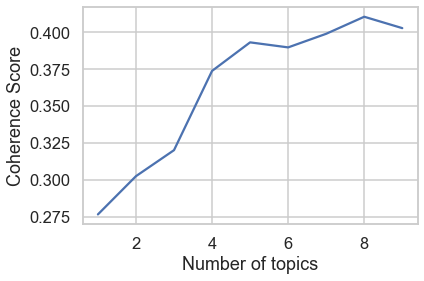

In [62]:
sb.lineplot(x='Topics_Number', y='cv_Coherence_avg', data=pd.DataFrame(results))
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")

In [66]:
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=3, 
                                                    random_state=100,
                                                    chunksize=100,
                                                    passes=50,
                                                    workers=20,
                                                    iterations=150,
                                                    minimum_probability=0)
lda_model.show_topics(formatted=False, num_words= 5)

[(0,
  [('year', 0.06440755),
   ('drug', 0.06397927),
   ('stopped', 0.027597886),
   ('taken', 0.025779996),
   ('social', 0.025324991)]),
 (1,
  [('le', 0.05530925),
   ('friend', 0.029369598),
   ('socialising', 0.027451452),
   ('access', 0.020377664),
   ('drug', 0.019645741)]),
 (2,
  [('use', 0.04294719),
   ('drug', 0.040473584),
   ('social', 0.038537607),
   ('party', 0.024082681),
   ('take', 0.022702256)])]

In [67]:
for idx, topic in lda_model.show_topics(formatted=False, num_words= 20):
    wordskeep = [w[0] for w in topic]
    print(f'Topic: {idx} \nWords: {wordskeep}')

Topic: 0 
Words: ['year', 'drug', 'stopped', 'taken', 'social', 'pandemic', 'recreational', 'many', 'used', 'taking', 'using', 'cannabis', 'since', 'time', 'use', 'home', 'activity', 'anything', 'change', 'interested']
Topic: 1 
Words: ['le', 'friend', 'socialising', 'access', 'drug', 'pandemic', 'want', 'used', 'would', 'reason', 'smoke', 'take', 'seeing', 'time', 'lockdown', 'get', 'social', 'cannabis', 'quit', 'health']
Topic: 2 
Words: ['use', 'drug', 'social', 'party', 'take', 'le', 'occasion', 'opportunity', 'go', 'people', 'event', 'friend', 'pandemic', 'need', 'would', 'also', 'lack', 'fewer', 'due', 'festival']


In [68]:
!pip install wordcloud

In [71]:
from wordcloud import WordCloud

{'year': 0.06440754, 'drug': 0.06397926, 'stopped': 0.027597882, 'taken': 0.025779992, 'social': 0.025324987, 'pandemic': 0.018153014, 'recreational': 0.016004976, 'many': 0.013435349, 'used': 0.013138636, 'taking': 0.012823516, 'using': 0.012740422, 'cannabis': 0.011881582, 'since': 0.010350477, 'time': 0.0103113875, 'use': 0.010091711, 'home': 0.009702704, 'activity': 0.008501541, 'anything': 0.0075302, 'change': 0.0074656163, 'interested': 0.0073368587, 'anyway': 0.007329017, 'took': 0.007088086, 'interaction': 0.0069885, 'ever': 0.006883601, 'long': 0.0068831192, 'tried': 0.0065284856, 'smoking': 0.0064286496, 'wanted': 0.0060749915, 'last': 0.0058920505, 'rarely': 0.0055626608, 'situation': 0.0052840197, 'user': 0.0051893555, 'stop': 0.0051808977, 'really': 0.0048002903, 'supply': 0.0045920494, 'nothing': 0.0045854575, 'le': 0.0044054543, 'others': 0.00407476, 'smoked': 0.0039740447, 'need': 0.003810566, 'would': 0.0036178, 'interest': 0.0036148834, 'never': 0.0034182218, 'questio

(-0.5, 399.5, 199.5, -0.5)

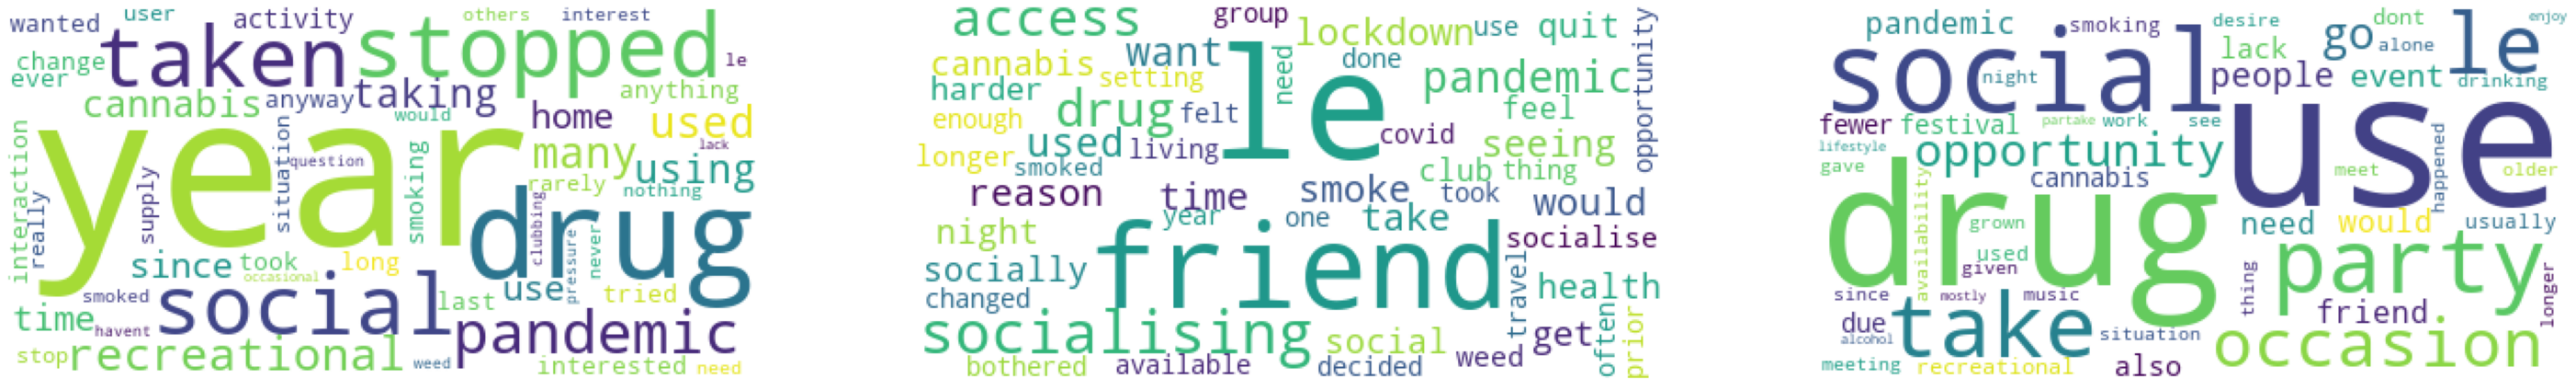

In [72]:
plt.figure(figsize=(50,50))
plt.subplot(1,3,1)
words_topic = {}
for word, probability in lda_model.show_topic(0, topn = 50): #1 means that we are extracting the words, probability for topic 2
    words_topic[word] = probability
print(words_topic)
wc = WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(words_topic)
plt.imshow(wc)
plt.axis("off")

plt.subplot(1,3,2)
words_topic1 = {}
for word, probability in lda_model.show_topic(1, topn = 50): #1 means that we are extracting the words, probability for topic 1
    words_topic1[word] = probability
print(words_topic1)
wc = WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(words_topic1)
plt.imshow(wc)
plt.axis("off")

plt.subplot(1,3,3)
words_topic2 = {}
for word, probability in lda_model.show_topic(2, topn = 50): #1 means that we are extracting the words, probability for topic 2
    words_topic2[word] = probability
print(words_topic2)
wc = WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(words_topic2)
plt.imshow(wc)
plt.axis("off")




In [80]:
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)
print("Answer", df_cleaned[17])
print(all_topics[17])

Answer ['social', 'aspect', 'gone']
[(0, 0.08637898), (1, 0.08435957), (2, 0.8292614)]


In [81]:
#Topic1: less access, topic2: health reasons, topic 3: less socialising?

In [82]:
all_topics_df = pd.DataFrame(gensim.matutils.corpus2csc(all_topics).T.toarray())
all_topics_df

,0,1,2
0,0.53,0.40,0.06
1,0.67,0.17,0.17
2,0.26,0.25,0.49
3,0.76,0.11,0.13
4,0.08,0.85,0.07
...,...,...,...
952,0.18,0.65,0.17
953,0.57,0.04,0.39
954,0.09,0.61,0.29
955,0.40,0.09,0.52


In [83]:
all_topics_df.rename(columns={0:'Topic_1',1:'Topic_2',2:'Topic_3'},inplace=True)
all_topics_df

,Topic_1,Topic_2,Topic_3
0,0.53,0.40,0.06
1,0.67,0.17,0.17
2,0.26,0.25,0.49
3,0.76,0.11,0.13
4,0.08,0.85,0.07
...,...,...,...
952,0.18,0.65,0.17
953,0.57,0.04,0.39
954,0.09,0.61,0.29
955,0.40,0.09,0.52


In [84]:
all_topics_df['dominant_topic_contribution'] = all_topics_df.max(axis = 1) 
all_topics_df['dominant_topic'] = np.argmax(all_topics_df.values, axis=1)
all_topics_df

,Topic_1,Topic_2,Topic_3,dominant_topic_contribution,dominant_topic
0,0.53,0.40,0.06,0.53,0
1,0.67,0.17,0.17,0.67,0
2,0.26,0.25,0.49,0.49,2
3,0.76,0.11,0.13,0.76,0
4,0.08,0.85,0.07,0.85,1
...,...,...,...,...,...
952,0.18,0.65,0.17,0.65,1
953,0.57,0.04,0.39,0.57,0
954,0.09,0.61,0.29,0.61,1
955,0.40,0.09,0.52,0.52,2


In [85]:
all_topics_df["dominant_topic"].value_counts()

1    334
2    318
0    305
Name: dominant_topic, dtype: int64

In [87]:
df.shape, all_topics_df.shape

((1013, 3), (957, 5))

In [88]:
answers_df = df.drop(dropped_ids)
answers_df.head()

,user_id,How,Why
0,0b4d4414-529a-4c54-bed8-e0936cb09576,I am using less,less bothered too lazy even for drugs
1,0e6e9a41-671d-44b5-9825-483dc1066606,I am using less,stopped
2,0faf0029-b51c-40dd-9738-8e1467b1079c,I am using less,i’ve been away from uni and with my family instead so less peer pressure and access to drugs also haven’t been able to go out to clubs where most of my drug use occurs
3,11ddca95-7fbf-4d83-b3a9-5a68d75bb210,I am using less,no social interaction
4,1d9d9d93-4933-485e-97c1-025038933c0d,I am using less,online order easier or mushrooms


In [89]:
answers_df.shape, all_topics_df.shape

((957, 3), (957, 5))

In [90]:
finaldf = pd.concat([all_topics_df.reset_index(), answers_df.reset_index()], axis = 1)
print(finaldf.shape)
finaldf.head()

(957, 10)


,index,Topic_1,Topic_2,Topic_3,dominant_topic_contribution,dominant_topic,index,user_id,How,Why
0,0,0.53,0.40,0.06,0.53,0,0,0b4d4414-529a-4c54-bed8-e0936cb09576,I am using less,less bothered too lazy even for drugs
1,1,0.67,0.17,0.17,0.67,0,1,0e6e9a41-671d-44b5-9825-483dc1066606,I am using less,stopped
2,2,0.26,0.25,0.49,0.49,2,2,0faf0029-b51c-40dd-9738-8e1467b1079c,I am using less,i’ve been away from uni and with my family instead so less peer pressure and access to drugs also haven’t been able to go out to clubs where most of my drug use occurs
3,3,0.76,0.11,0.13,0.76,0,3,11ddca95-7fbf-4d83-b3a9-5a68d75bb210,I am using less,no social interaction
4,4,0.08,0.85,0.07,0.85,1,4,1d9d9d93-4933-485e-97c1-025038933c0d,I am using less,online order easier or mushrooms


In [94]:
n_largest = 10
unique_topics = finaldf['dominant_topic'].unique()
largest_contributors_per_topic = {}
for topic in unique_topics:
    topic_df = finaldf[finaldf['dominant_topic'] == topic]
    largest_contibutors_idx = topic_df['dominant_topic_contribution'].sort_values(ascending = False).iloc[:n_largest].index
    largest_contibutors_df = topic_df.loc[largest_contibutors_idx, :]
    largest_contributors_per_topic[topic] = largest_contibutors_df
    
top_opinions_df_ = pd.concat(largest_contributors_per_topic).reset_index(drop=True)
top_opinions_df_.head(10)

,index,Topic_1,Topic_2,Topic_3,dominant_topic_contribution,dominant_topic,index,user_id,How,Why
0,302,0.98,0.01,0.01,0.98,0,319,ddabcace-5fdf-4850-a965-08fbae7e1999,I am using less,it initially increased because what the frick else was i to do with my time (in retrospect i could have been doing many many things other than smoking cannabis but hey ho cannot change the past) then i went back to my family home for summer and i do not smoke there so i stopped plus i had a surgery coming up so i needed to stop anyway after the surgery i have not been smoking at all (excluding the last week because of the holidays wooo)
1,539,0.98,0.01,0.01,0.98,0,570,580a4c02-9341-45e6-9118-e52c842bd793,I am using less,a change in employment status (employed>unemployed>self employed) has drastically affected the amount of freeleisure time available in which topartake in recreational cannabis usefurthermore due to the increased work hours i find that i am more tired on arrival home and need to smoke less to help wind down fterwards
2,9,0.97,0.01,0.01,0.97,0,9,2a10143b-a77b-4cce-ba47-3b5949939d8b,I am using less,i have tried drugs in the past mainly cannabis but i stopped years ago and have not taken anything since unfortunately since this scenario is never envisaged the test seems to assume that if you tried drugs once (as asked) you will never stop
3,813,0.97,0.02,0.02,0.97,0,862,a4b08af8-6d3d-48d9-a9d6-83f00e05f3d3,I am using less,i got caught selling weed during lockdown i have now stopped selling it part of my sentence was to attend a drug rehabilitation (on the phone due to covid) so i stopped using opiates now taking espranor (bupronorphene blocker)
4,910,0.96,0.02,0.02,0.96,0,963,95beca11-d221-433c-b152-371d281a1798,I am using less,trying to stop anyways too expensive tolerance levels are too high and it doesn't work like it used to due to stress from other ongoing issues mental health needs a break but need cannabis for creative purposes
5,355,0.96,0.02,0.02,0.96,0,374,2d91c791-1492-47f8-bf57-e2f8522c113d,I am using less,i have toyed with the idea of having a private magic mushroom experience in holland after the pandemic is over personally with my meditation practice i'm now too conscientious to engage with illegal activity in the uk
6,673,0.96,0.02,0.02,0.96,0,717,ccf4ea94-aece-4ba6-90e6-5db5b3062804,I am using less,stopped taking cannabis when i was after a single use and subsequent bad trip on acid and suffered neurological disorders and deep depression that lasted for over yrs
7,915,0.95,0.03,0.03,0.95,0,968,d605ed52-8223-4f77-8956-b3c1c81f2247,I am using less,i took drugs a long time ago not recently and started this section in error i haven't taken recreational drugs for for more than years
8,211,0.94,0.03,0.03,0.94,0,223,f9f410b8-dae6-4ec7-b0a5-4ab29d69b50c,I am using less,more an occassional social thing a few times a year but always wary of becoming addicted or it leading to other drugs
9,946,0.94,0.03,0.03,0.94,0,1002,106a7163-3d0f-4df9-8548-5cefe1e3a8bf,I am using less,i stopped taking drugs a couple of years ago when i got married my drug use is not related to the pandemic
